In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Before RFM- Analysis Sales Data

In [3]:
sales_df = pd.read_csv("sales.csv")


In [4]:
sales_df.shape

(375187, 8)

In [3]:
sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
sales_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
# Unique values Number of unique value of indival columns
sales_df[['Description', 'CustomerID', 'Country']].nunique()

Description    3674
CustomerID     4311
Country          37
dtype: int64

In [6]:
print("The Sales Start  :",sales_df['InvoiceDate'].min())
print("The Sales End  :",sales_df['InvoiceDate'].max())


The Sales Start  : 2010-12-01 08:26:00
The Sales End  : 2011-12-09 12:50:00


In [7]:
sales_df["Total Price"] = sales_df["Quantity"]*sales_df["UnitPrice"]

## After Converting Segmentation

In [9]:
segment_data = pd.read_csv("RFM_segmentation.csv")
segment_data.shape

(4311, 9)

In [10]:
segment_data.head()

,customerID,Recency,Frequency,Monetary,R_score,F_score,M_score,FM_score,rfm_segment
0,13357.0,256,84.0,533.0,1,5,3,4,Cant Lose Them
1,16022.0,259,70.0,557.0,1,5,3,4,Cant Lose Them
2,15437.0,261,44.0,192.0,1,5,1,3,At Risk
3,15457.0,261,57.0,217.0,1,5,1,3,At Risk
4,16721.0,261,37.0,292.0,1,5,2,4,Cant Lose Them


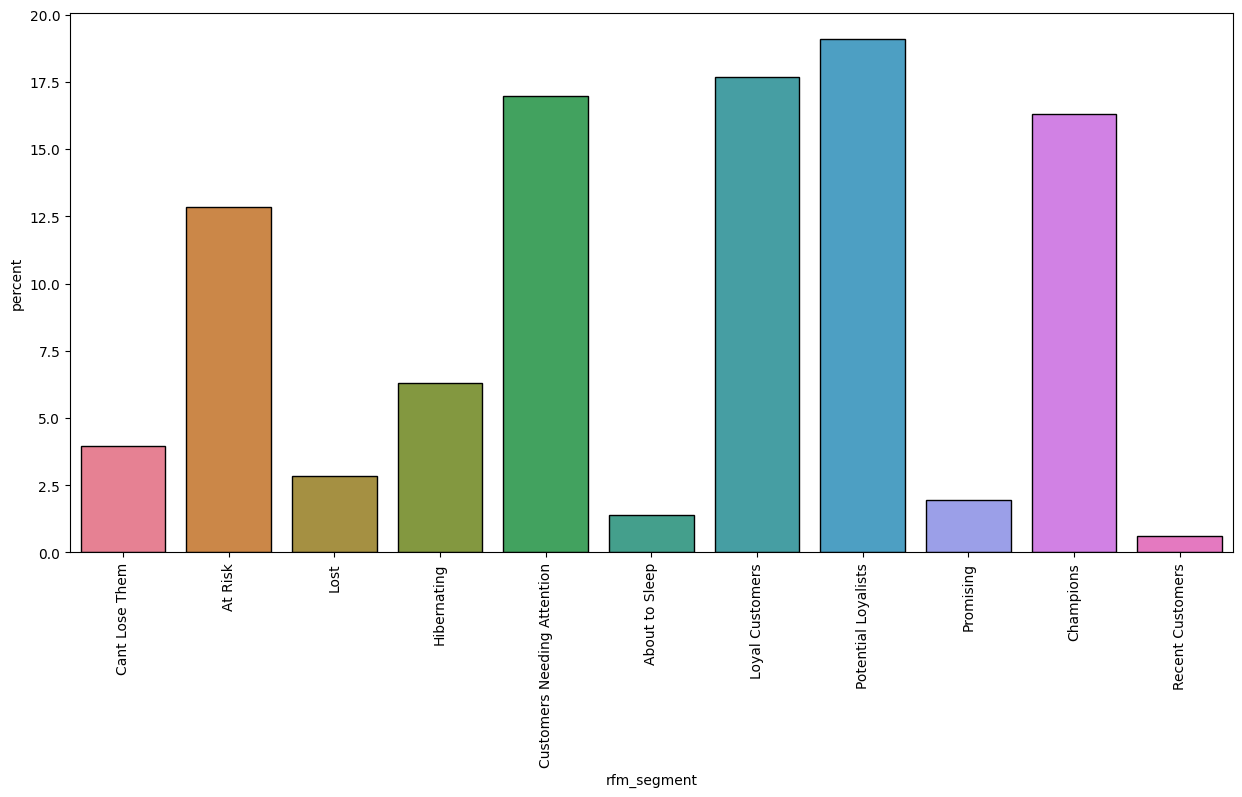

In [22]:

plt.figure(figsize = (15,7))
sns.countplot(data = segment_data,x = "rfm_segment",hue = "rfm_segment",edgecolor = "black", stat = "percent")
plt.xticks(rotation = 90)
plt.show()

In [35]:
round((segment_data['rfm_segment'].value_counts()/segment_data.shape[0])*100,2).reset_index().rename(columns = {"count":"Percent of Users"})

,rfm_segment,Percent of Users
0,Potential Loyalists,19.09
1,Loyal Customers,17.70
2,Customers Needing Attention,16.98
3,Champions,16.31
4,At Risk,12.85
5,Hibernating,6.29
6,Cant Lose Them,3.97
7,Lost,2.85
8,Promising,1.95
9,About to Sleep,1.39
